## Reading the csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('files/test.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.0,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.0,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.0,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.0,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0


In [3]:
test_label = pd.read_csv('files/test_label.csv')
test_label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [4]:
test.isna().sum()   # checking for null values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [5]:
test_label.isna().sum()

0    0
dtype: int64

### No null values found

## Time series plot with anomalies

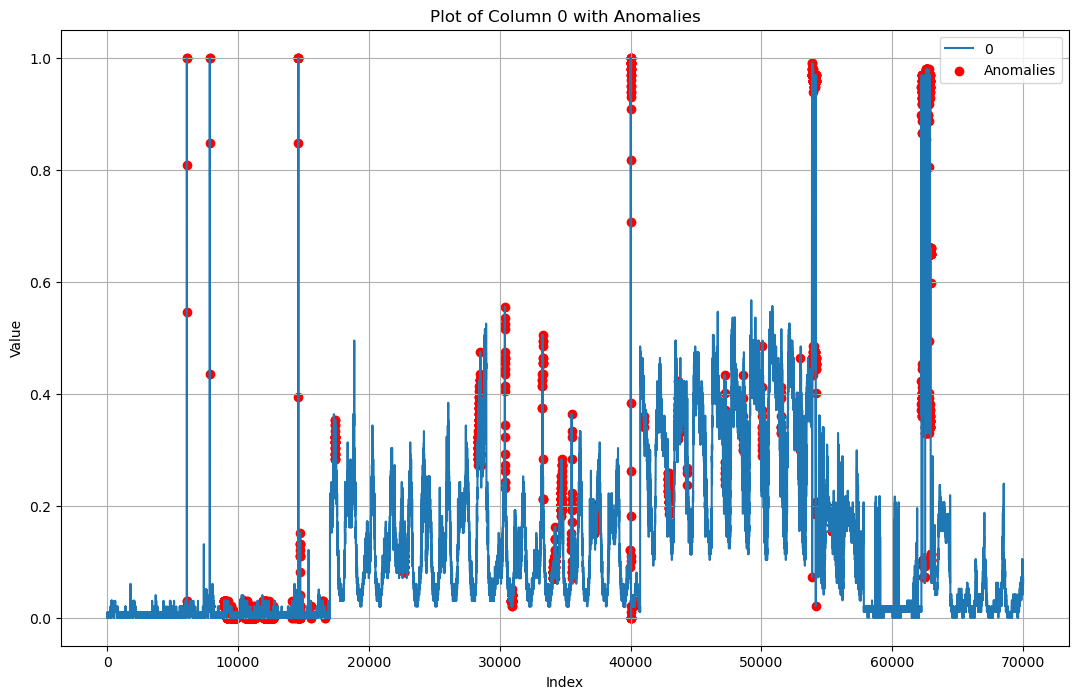

In [6]:
plt.figure(figsize=(13, 8))
x = test['0']
x.plot()
anomaly_indices = test_label[test_label.iloc[:, 0] == 1].index
anomaly_values = x.loc[anomaly_indices]
plt.scatter(anomaly_values.index, anomaly_values, color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'Plot of Column 0 with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import math
def plot_graph(data, anomaly):
    plt.figure(figsize=(13, 60))
    for a, i in enumerate(data.columns):
        x = data[i]
        plt.subplot(math.ceil(len(data.columns)/3),3,a+1)
        # x.plot(style = 'k.')
        x.plot()
        anomaly_indices = anomaly[anomaly.iloc[:, 0] == 1].index
        anomaly_values = x.loc[anomaly_indices]
        plt.scatter(anomaly_values.index, anomaly_values, color='red', label='Anomalies')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title(f'Plot of Column {i} with Anomalies')
        plt.legend()
        plt.grid(True)
    plt.show()

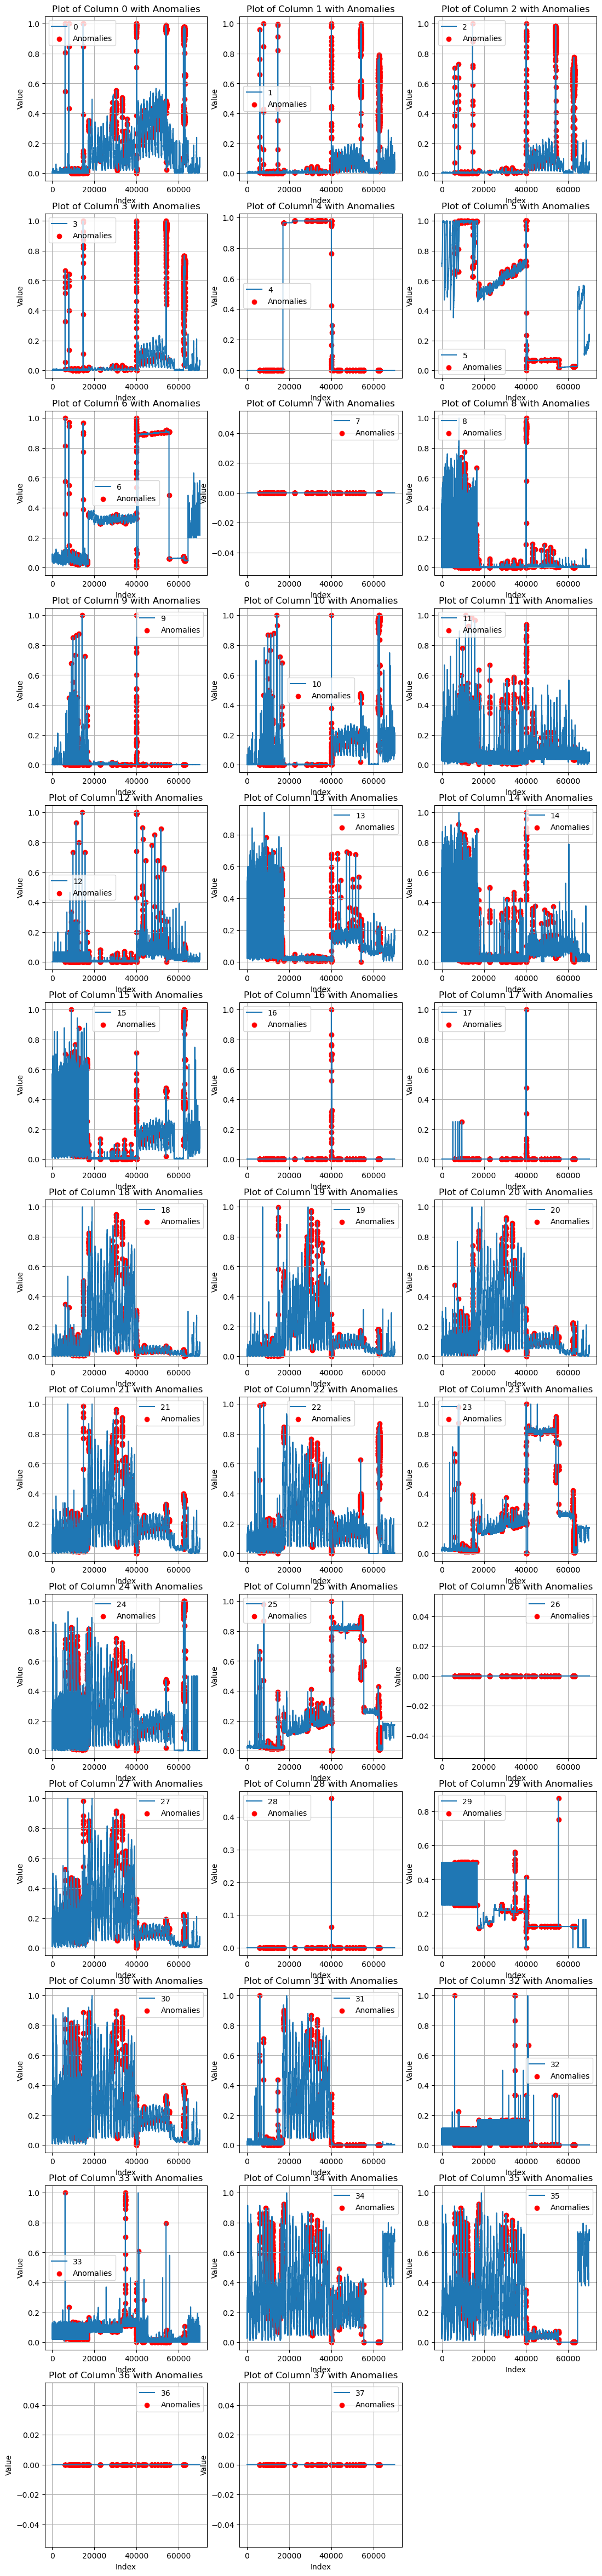

In [8]:
plot_graph(test, test_label)           # plotting every column in test dataset along with the anomalies

###

## EDA

### * We can perform EDA just by looking at the graph above and we can have brief understanding of relationship between all the columns and the anomalies.
### * We can see from the graph that columns like 4, 7, 16, 17, 26, 28, 36, 37 have no effect on the anomalies.
### * We can also see that how the columns like 3, 5, 6 effect the anomalies.

###

## Finding the variables which possibly could be the root cause of anomalies

In [9]:
from sklearn.ensemble import RandomForestClassifier
def print_importance(X,y):
    y = y.iloc[:,0]
    clf = RandomForestClassifier()
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    sorted_data = feature_importances.argsort()[::-1]
    for i in sorted_data:
        print(f"Feature {i}: Importance {feature_importances[i]}")

In [10]:
print_importance(test, test_label)

Feature 5: Importance 0.1418418933053868
Feature 2: Importance 0.07352092747498948
Feature 3: Importance 0.06216890881561084
Feature 1: Importance 0.053231560003523415
Feature 34: Importance 0.047664067593509996
Feature 35: Importance 0.0474712364409136
Feature 6: Importance 0.04573257650456328
Feature 15: Importance 0.04335144178062366
Feature 23: Importance 0.04066250440962642
Feature 19: Importance 0.039415204586007065
Feature 25: Importance 0.03536634471657268
Feature 22: Importance 0.03463838689472404
Feature 24: Importance 0.03458235304868389
Feature 18: Importance 0.02549857343863235
Feature 21: Importance 0.02525614910576649
Feature 27: Importance 0.02474167853722034
Feature 20: Importance 0.02427437906452599
Feature 31: Importance 0.02374889238939597
Feature 30: Importance 0.023245168454912896
Feature 14: Importance 0.02237161858660157
Feature 11: Importance 0.021504307128087957
Feature 0: Importance 0.02150201098905933
Feature 13: Importance 0.01885617651823915
Feature 10: Im

### Above we have a descending list of columns along with its importance, this shows that the top columns are most likely be the root causes for anomalies since some small changes in them affects the anomalies.

###

## Similarly we can do for the remaining files

## Reading the smap files

In [11]:
smap_test = pd.read_csv('files/smap_test.csv')
smap_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [12]:
smap_test_label = pd.read_csv('files/smap_test_label.csv')
smap_test_label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
smap_test.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [14]:
smap_test_label.isna().sum()

0    0
dtype: int64

### No null values so we can proceed further

## Plotting the graphs

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


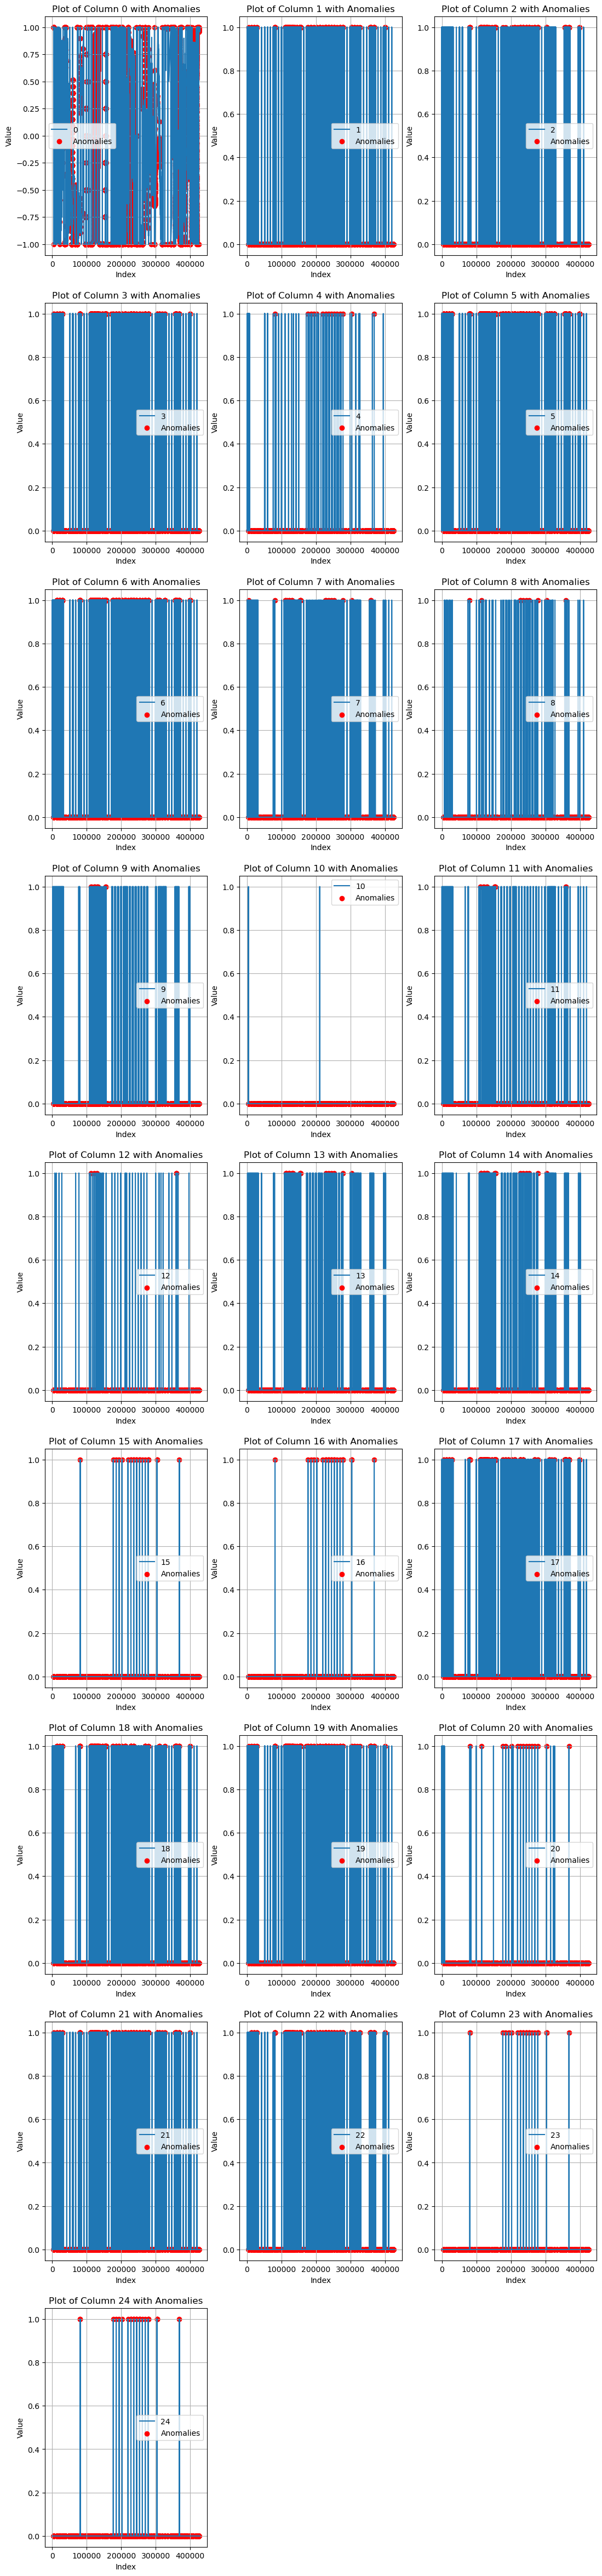

In [15]:
plot_graph(smap_test, smap_test_label)

###

## EDA

### As we can see from these graphs that:
### * when the values of the columns like 8, 9, 10, 11, 12 is 0 then there is anomalies in the data.
### * Others columns does not show much information we can try the feature importance for the further step.

###

## Finding the Variables

In [16]:
print_importance(smap_test, smap_test_label)

Feature 0: Importance 0.9932749545046916
Feature 5: Importance 0.00190865286799973
Feature 6: Importance 0.0016880401671976277
Feature 1: Importance 0.0003472512069382966
Feature 3: Importance 0.00034402817230840975
Feature 22: Importance 0.00028754152830689285
Feature 21: Importance 0.0002818856731946789
Feature 19: Importance 0.0002538612221857176
Feature 23: Importance 0.00022222410169472055
Feature 17: Importance 0.0001860866432823578
Feature 24: Importance 0.00016437994404796077
Feature 20: Importance 0.00016048012111322064
Feature 15: Importance 0.00015209234941576208
Feature 16: Importance 0.00014634060601943641
Feature 18: Importance 0.00014375095046820075
Feature 2: Importance 0.00010499664677860349
Feature 7: Importance 9.76696390963656e-05
Feature 11: Importance 8.20595830011796e-05
Feature 4: Importance 6.39099284582383e-05
Feature 9: Importance 2.4066853421272442e-05
Feature 8: Importance 2.192079623735503e-05
Feature 12: Importance 1.8246293146971376e-05
Feature 13: Impor

### here we can see the variables which are the root causes of the anomalies.

##

## Reading the psm files

In [17]:
psm_test = pd.read_csv('files/psm_test.csv', index_col=0)
psm_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
timestamp_(min),,,,,,,,,,,,,,,,,,,,,
132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,0.478078,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,0.494367,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,0.484878,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,0.488316,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,0.487094,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599


In [18]:
psm_test_label = pd.read_csv('files/psm_test_label.csv', index_col=0)
psm_test_label.head()

,label
timestamp_(min),
132480.0,0
132481.0,0
132482.0,0
132483.0,0
132484.0,0


In [19]:
psm_test.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
dtype: int64

In [20]:
psm_test_label.isna().sum()

label    0
dtype: int64

## plotting the graph along with anomalies

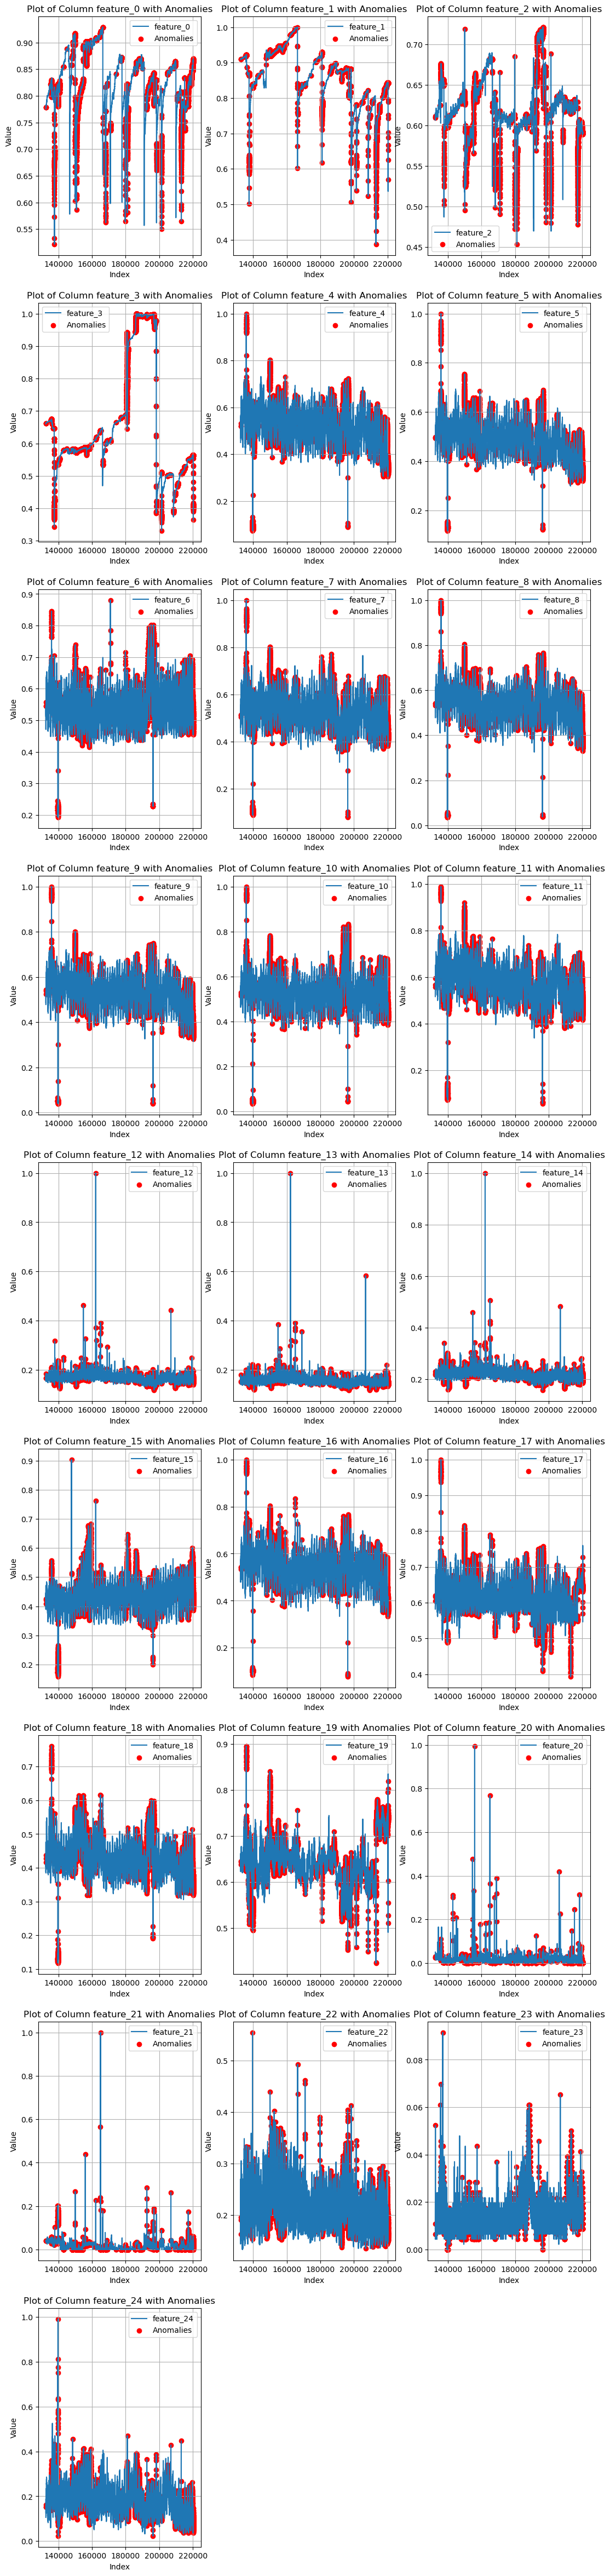

In [21]:
plot_graph(psm_test, psm_test_label)

###

### EDA

### from the graph we can say that:
### * columns from 0 to 3 have perfect sync with the anomalies they could be the root causes according to the primary analysis.
### * we can cross check the analysis in the next step.

###

## Finding the variables

In [22]:
print_importance(psm_test, psm_test_label)

Feature 1: Importance 0.18180155248822477
Feature 2: Importance 0.14582213874160185
Feature 3: Importance 0.1268633308349326
Feature 19: Importance 0.10075972021014953
Feature 0: Importance 0.07142943144466445
Feature 18: Importance 0.041918686698573994
Feature 15: Importance 0.035894539951249096
Feature 23: Importance 0.03579747613496698
Feature 17: Importance 0.028950954704263888
Feature 13: Importance 0.02649414362453836
Feature 21: Importance 0.02611064123382858
Feature 20: Importance 0.01724093176884521
Feature 6: Importance 0.016022251753521236
Feature 24: Importance 0.0148271086660137
Feature 4: Importance 0.014521552364136355
Feature 10: Importance 0.013954191203797291
Feature 5: Importance 0.01374044151701532
Feature 12: Importance 0.013672570032348057
Feature 14: Importance 0.013270626665714125
Feature 9: Importance 0.011554077364900226
Feature 11: Importance 0.011032575201441776
Feature 22: Importance 0.010384795146108829
Feature 16: Importance 0.010278393479958065
Feature 8

### As we can see that our primary analysis was right and not only that there are few othere variables which could be the root causes for the anomalies.

##

## Reading the msl files

In [ ]:
msl_test = pd.read_csv('files/msl_test.csv')
msl_test.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.946958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.942278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.936037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.923557,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.917317,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
msl_test_label = pd.read_csv('files/msl_test_label.csv')
msl_test_label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
msl_test.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [ ]:
msl_test_label.isna().sum()

0    0
dtype: int64

### No null values

####

## Plotting the graph

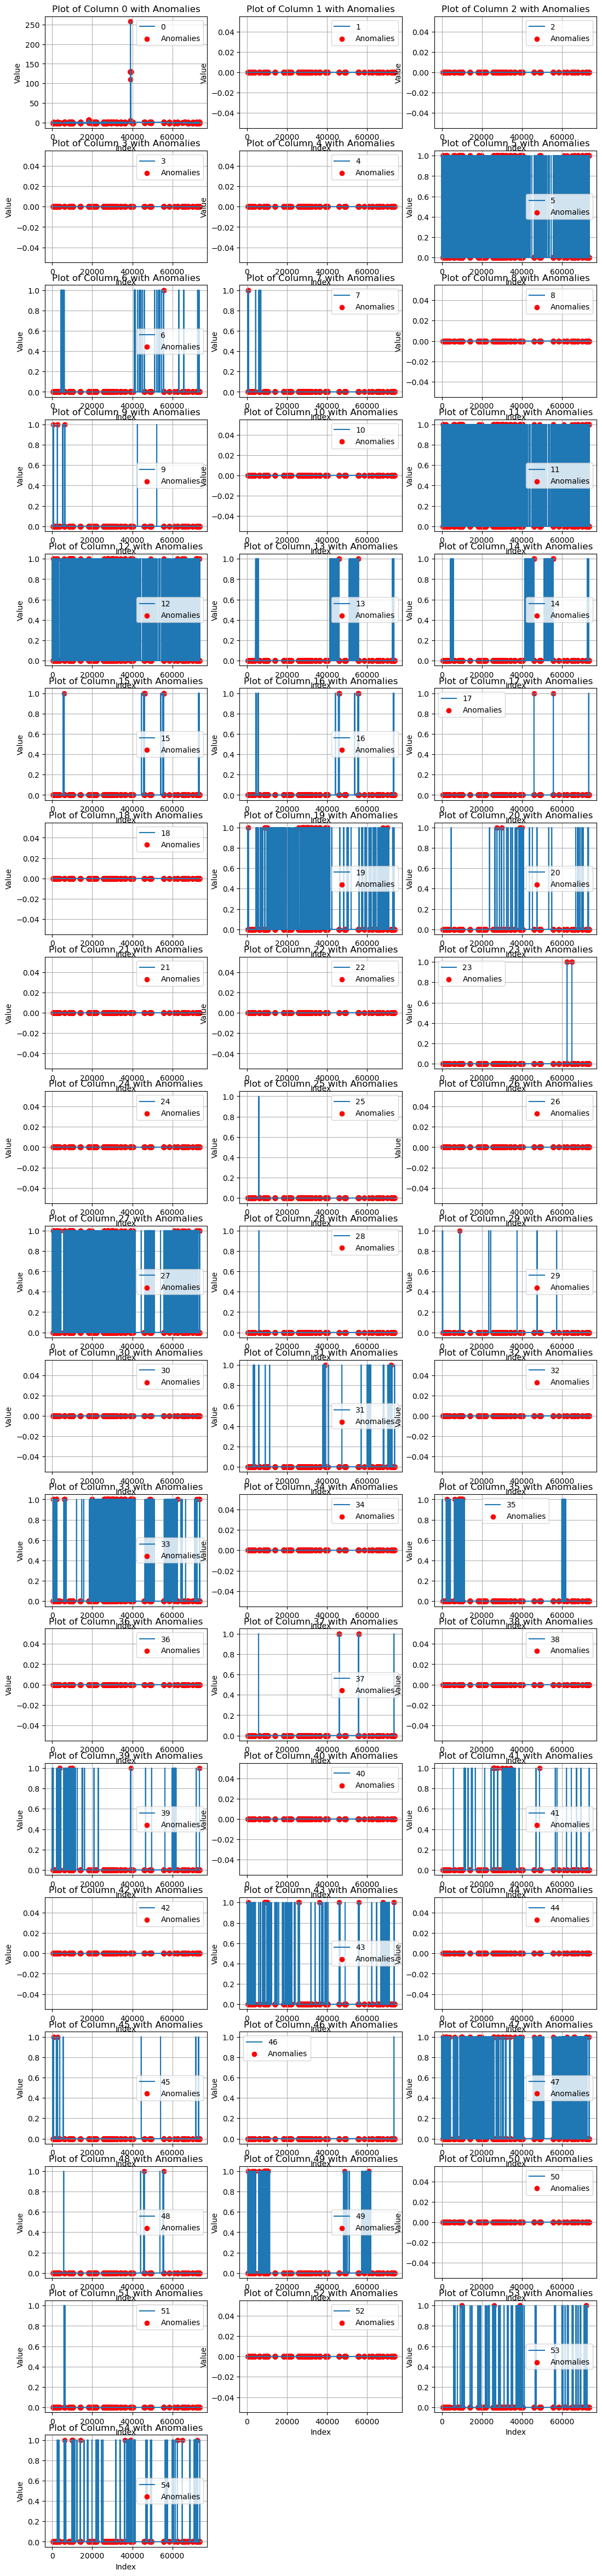

In [ ]:
plot_graph(msl_test, msl_test_label)

###

## EDA

### Findings from the graph:
### * we know that when a variable has only one kind of value then it does not have any effect on the model. From this we can find many columns which does not have any effect like 50, 52, 44, 42, 38, 36, 34, 32 many more.

###

## Finding the variables

In [ ]:
print_importance(msl_test, msl_test_label)

Feature 0: Importance 0.97994978591634
Feature 33: Importance 0.0031472306385735994
Feature 14: Importance 0.0018049408095377802
Feature 5: Importance 0.0017064335082347568
Feature 13: Importance 0.0016344223104674024
Feature 15: Importance 0.0013217350063579694
Feature 11: Importance 0.0010541002454352683
Feature 37: Importance 0.0009920593671582162
Feature 16: Importance 0.0009709761762156143
Feature 19: Importance 0.0009247927919496515
Feature 27: Importance 0.0007519634383269043
Feature 12: Importance 0.0007393427718301642
Feature 41: Importance 0.0007045163838278457
Feature 47: Importance 0.00067344446959802
Feature 23: Importance 0.000670288504574938
Feature 35: Importance 0.0005297810450594882
Feature 39: Importance 0.00036965944652386
Feature 17: Importance 0.000250682463546712
Feature 9: Importance 0.00022574462511359972
Feature 53: Importance 0.00022105038356155844
Feature 54: Importance 0.00020794594338360915
Feature 43: Importance 0.00018523525486027973
Feature 49: Importan

### In this there are not many variables that have high synergy with the anomalies. Hence we can easily pinpoint the root causes here, like the column 0.